In [4]:
import requests
res = requests.get('https://www.mof.gov.tw/Pages/Detail.aspx?nodeid=281&pid=72221', verify=False)
#res.text

C:\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [10]:
for a in soup.select('ol ol a'):
    if '.xls' in a['href']:
        print(a['href'])

http://www.mof.gov.tw/File/Attach/72221/File_8550.xls
http://www.mof.gov.tw/File/Attach/72221/File_8552.xls
http://www.mof.gov.tw/File/Attach/72221/File_8554.xls
http://www.mof.gov.tw/File/Attach/72221/File_8556.xls
http://www.mof.gov.tw/File/Attach/72221/File_8558.xls
http://www.mof.gov.tw/File/Attach/72221/File_8560.xls
http://www.mof.gov.tw/File/Attach/72221/File_8562.xls
http://www.mof.gov.tw/File/Attach/72221/File_8564.xls
http://www.mof.gov.tw/File/Attach/72221/File_8566.xls
http://www.mof.gov.tw/File/Attach/72221/File_8568.xls
http://www.mof.gov.tw/File/Attach/72221/File_8570.xls
http://www.mof.gov.tw/File/Attach/72221/File_8572.xls
http://www.mof.gov.tw/File/Attach/72221/File_8574.xls


In [11]:
res = requests.get('http://www.mof.gov.tw/File/Attach/72221/File_8550.xls')
with open('File_8550.xls', 'wb') as f:
    f.write(res.content)

In [13]:
res2 = requests.get('http://www.comicbus.com/pics/0/103.jpg')
with open('1.jpg', 'wb') as f:    
    f.write(res2.content)

In [18]:
f = 'http://www.mof.gov.tw/File/Attach/72221/File_8550.xls'
ary = f.split('/')
ary[-1]

'File_8550.xls'

In [20]:
def fileDownload(fileurl):
    res = requests.get(fileurl)
    filename = fileurl.split('/')[-1]
    with open(filename, 'wb') as f:
        f.write(res.content)
        
fileDownload('http://www.mof.gov.tw/File/Attach/72221/File_8550.xls')

In [21]:
for a in soup.select('ol ol a'):
    if '.xls' in a['href']:
        fileDownload(a['href'])

## 完整的財政部爬蟲範例 

In [ ]:
import requests
from bs4 import BeautifulSoup

def fileDownload(fileurl):
    res = requests.get(fileurl)
    filename = fileurl.split('/')[-1]
    with open(filename, 'wb') as f:
        f.write(res.content)
        
res = requests.get('https://www.mof.gov.tw/Pages/Detail.aspx?nodeid=281&pid=72221', verify=False)
soup = BeautifulSoup(res.text, 'html.parser')
for a in soup.select('ol ol a'):
    if '.xls' in a['href']:
        fileDownload(a['href'])

## 使用Pandas 整理資料

In [23]:
import pandas
df = pandas.read_clipboard()
df

,010121
0,10129
1,10130
2,10190
3,10221
4,10229


In [60]:
import pandas
df = pandas.read_excel('File_8550.xls', skiprows=range(0,5), skip_footer= 4)
df

,Unnamed: 0,Unnamed: 1,年 增 率,Unnamed: 3,年 增 率.1,Unnamed: 5,年 增 率.2
0,95年,225904.20,13.087276,206442.28,11.327098,19461.92,35.875458
1,96年,248792.02,10.131649,223115.39,8.076404,25676.63,31.932657
2,97年,258051.43,3.721748,244466.73,9.569640,13584.70,-47.093131
3,98年,205662.50,-20.301740,177597.78,-27.352986,28064.72,106.590667
4,99年,278008.16,35.176883,256274.04,44.300247,21734.12,-22.557140
5,100年,312922.86,12.558876,288062.20,12.403975,24860.66,14.385367
6,101年,306409.15,-2.081570,277323.84,-3.727794,29085.31,16.993338
7,102年,311428.01,1.637958,278009.70,0.247312,33418.31,14.897547
8,103年,320092.05,2.782039,281849.71,1.381251,38242.35,14.435309
9,104年,285343.56,-10.855781,237219.13,-15.834885,48124.43,25.840685


In [61]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', '年 增 率', 'Unnamed: 3', '年 增 率.1',
       'Unnamed: 5', '年 增 率.2'],
      dtype='object')

In [62]:
df.columns = ['yearmonth','importation','importation_annual','exportation','exportation_annual','import_export','import_export_annual']
df.columns

Index(['yearmonth', 'importation', 'importation_annual', 'exportation',
       'exportation_annual', 'import_export', 'import_export_annual'],
      dtype='object')

Populating the interactive namespace from numpy and matplotlib


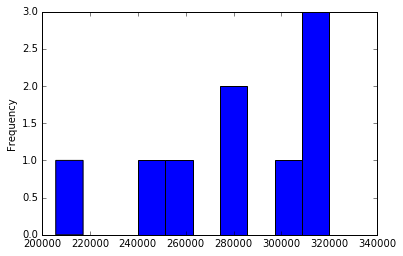

In [63]:
%pylab inline
df.ix[1:9,"importation"].plot(kind='hist')

In [64]:
df = df.ix[14:23,]

In [65]:
df['yearmonth'] = df['yearmonth'].map(lambda e:'2016-'+e.strip('月')+'-1')
df['yearmonth'] = pandas.to_datetime(df['yearmonth'], format = '%Y-%m-%d')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## 把資料塞進資料庫

In [67]:
?df.to_sql

In [68]:
import pymysql
db = pymysql.connect(host="localhost", user="root", 
                     passwd="test", db="trade",  charset='utf8')

In [69]:
df.to_sql('trade_import_export', con = db, flavor='mysql', if_exists='append')

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:1165: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy connectables.
  chunksize=chunksize, dtype=dtype)


In [74]:
df2 = pandas.read_sql_query('SELECT SUM(importation) as S FROM trade_import_export;', con = db)
df2

,S
0,229376.97


In [76]:
for ele in df2.iterrows():
    print(ele)
    print(ele[1]['S'])

(0, S    229376.97
Name: 0, dtype: float64)
229376.97


In [78]:
db.close()